# 11. Combination of Naive Bayes Methods

In [9]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [10]:
df = pd.read_csv("../2_data/X_train.csv")

# Load the dataset

# Read the dataset from CSV files
X_train = pd.read_csv("../2_data/X_train.csv")
X_test = pd.read_csv("../2_data/X_test.csv")
y_train = pd.read_csv("../2_data/y_train.csv")
y_test = pd.read_csv("../2_data/y_test.csv")

# Ensure the target variable has the correct shape (1D array)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5634, 83)
X_test shape: (1409, 83)
y_train shape: (5634,)
y_test shape: (1409,)


Since the dataset has boolean features encoded as integers as well as float features and integer features that are continuous, it might be suitable to test a combination of both Gaussian Naive Bayes (GNB) and Multinomial Naive Bayes methods to make a prediction. Gaussian Naive Bayes is effective for continuous features that follow a normal distribution, while Multinomial Naive Bayes is suitable for discrete features, such as the boolean encoded integers. By combining these methods, we can leverage the strengths of each algorithm to improve the overall prediction performance.

## Data Visualization

### Feature Analysis

Integer Columns (int64):
 - Unnamed: 0
 - Count
 - Age
 - Number of Dependents
 - Zip Code
 - Number of Referrals
 - Tenure in Months
 - Avg Monthly GB Download
 - Total Extra Data Charges
 - Satisfaction Score
 - Churn Value
 - Churn Score
 - CLTV
 - LoyaltyID
 - Tenure

Float Columns (float64):
 - Latitude
 - Longitude
 - Avg Monthly Long Distance Charges
 - Monthly Charge
 - Total Charges
 - Total Refunds
 - Total Long Distance Charges
 - Total Revenue
 - Monthly Charges


In [11]:
category_columns = []
int_columns = []
float_columns = []
object_columns = []
category_columns = []

for col in df.columns:
    dtype = df[col].dtype
    if dtype == 'object':
        object_columns.append(col)
    elif dtype == 'int64':
        int_columns.append(col)
    elif dtype == 'float64':
        float_columns.append(col)
    else:
        category_columns.append(col)  

print("Integer Columns (int64):")
for col in int_columns:
    print(f" - {col}")

print("\nFloat Columns (float64):")
for col in float_columns:
    print(f" - {col}")

print("\nObject Columns (object):")
for col in object_columns:
    print(f" - {col}")

print("\nCategory Columns (category):")
for col in category_columns:
    print(f" - {col}")

Integer Columns (int64):
 - Count
 - Gender
 - Age
 - Under 30
 - Senior Citizen
 - Married
 - Dependents
 - Number of Dependents
 - City
 - Zip Code
 - Referred a Friend
 - Number of Referrals
 - Tenure in Months
 - Phone Service
 - Multiple Lines
 - Internet Service
 - Avg Monthly GB Download
 - Online Security
 - Online Backup
 - Device Protection Plan
 - Premium Tech Support
 - Streaming TV
 - Streaming Movies
 - Streaming Music
 - Unlimited Data
 - Paperless Billing
 - Total Extra Data Charges
 - Satisfaction Score
 - CLTV
 - Partner
 - Tenure
 - Country_United States
 - State_California
 - Quarter_Q3
 - Offer_Offer A
 - Offer_Offer B
 - Offer_Offer C
 - Offer_Offer D
 - Offer_Offer E
 - Internet Type_Cable
 - Internet Type_DSL
 - Internet Type_Fiber Optic
 - Contract_Month-to-Month
 - Contract_One Year
 - Contract_Two Year
 - Payment Method_Bank Withdrawal
 - Payment Method_Credit Card
 - Payment Method_Mailed Check
 - Device Protection_No
 - Device Protection_No internet service

Separate the dataset into two subsets:
1.	Continuous features (floats and original integer types that are not 0/1).
2.	Binary features (the 0/1 boolean encoded ones).

In [12]:
# Continuous features (floats and original integer types that are not 0/1)
continuous_features = [col for col in df.columns if df[col].dtype == 'float64' or (df[col].dtype == 'int64' and df[col].nunique() > 2)]

# Binary features (the 0/1 boolean encoded ones)
binary_features = [col for col in df.columns if df[col].dtype == 'int64' and df[col].nunique() == 2]

print("Continuous Features:")
print(continuous_features)

print("\nBinary Features:")
print(binary_features)

print(f"Number of continuous features: {len(continuous_features)}")
print(f"Number of binary features: {len(binary_features)}")

Continuous Features:
['Age', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'CLTV', 'Tenure', 'Monthly Charges', 'Lat', 'Long', 'SeniorCitizen_Dependents', 'Tenure_Age_Ratio', 'AvgMonthlyGB_StreamServices', 'MonthlyCharge_TotalCharges_Ratio', 'AvgMonthlyGB_Tenure', 'Total_Services_Used', 'Streaming_Services_Count', 'Tenure_in_Years', 'Monthly_Charges_Scaled', 'Refund_to_Charges_Ratio', 'Extra_Data_Usage_Cost_Proportion', 'Lifetime_Value_per_Month']

Binary Features:
['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Referred a Friend', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Strea

### Feature Preparation for GNB

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the continuous features and transform them
X_train_continuous_scaled = scaler.fit_transform(X_train[continuous_features])
X_test_continuous_scaled = scaler.transform(X_test[continuous_features])

# Print the scaled continuous features
print("Scaled Continuous Features (Train):")
print(X_train_continuous_scaled)

print("\nScaled Continuous Features (Test):")
print(X_test_continuous_scaled)

Scaled Continuous Features (Train):
[[-1.39137733 -0.48230353 -1.27350946 ... -0.16825819 -0.11872453
   0.50879151]
 [ 0.75701875  2.62673317  0.8767037  ... -0.16825819 -0.11872453
  -0.27743449]
 [-1.451055   -0.48230353 -0.26183579 ... -0.16825819 -0.11872453
  -0.43519509]
 ...
 [-0.85427831  2.62673317  0.97103983 ...  1.70176241 -0.11872453
  -0.14902546]
 [-0.97363365 -0.48230353  0.16755625 ... -0.16825819 -0.11872453
  -0.44054084]
 [ 1.65218379 -0.48230353 -0.09918729 ...  2.82489435 -0.11872453
  -0.42691019]]

Scaled Continuous Features (Test):
[[-1.27202199e+00 -4.82303528e-01 -7.04239710e-01 ... -1.68258191e-01
   2.95385810e+00  4.24925132e+00]
 [-4.96212297e-01 -4.82303528e-01  1.44272048e+00 ... -1.68258191e-01
  -1.18724528e-01 -3.28447162e-01]
 [-4.36534628e-01 -4.82303528e-01 -1.32230401e+00 ... -1.68258191e-01
  -1.18724528e-01 -4.59953134e-01]
 ...
 [-1.57041034e+00 -4.82303528e-01  1.46874424e+00 ... -1.68258191e-01
  -1.18724528e-01 -1.66674898e-01]
 [-1.092988

For Gaussian Naive Bayes, we only analyze the int and float datatypes to check if they are normally distributed because this algorithm assumes that the features follow a normal (Gaussian) distribution. For the Boolean datatypes that we have converted into integers, we can apply Multinomial Naive Bayes.

- `get_numeric_features_distribution` - shows distributions of all numeric features from provided dataframe. Flag  `compare_with_normal_distribution` is for comparison existing features' distributions with the normal distribution since Gaussian Naive Bayes assumes that features are normally distributed. For estimation of the feature distributions were chosen the following metrics:
    - Kolmogorov-Smirnov (KS) test which assesses whether a sample comes from a specific distribution.
    - P-value, which indicates the probability of observing a KS statistic as extreme as the one computed from the sample, assuming the null hypothesis is true. Small p-value (< 0.05) indicates a significant difference between the sample and the specified distribution, Large p-value (> 0.05) suggests that there is no significant difference.
- `get_feature_distribution` - shows distribution for the particular feature (latitude by default)

As redundant and irrelevant variables can decrease performance of the Naive Bayes, we will try to omit them. Correlation matrix will help us to reveal redundant features (features with strong correlation)

In [14]:
# Remove highly correlated features
features_to_remove = ['Monthly_Charges_Scaled', 'Lat', 'Monthly Charges', 'Tenure_in_Years', 'Long', 'Tenure', 'Total Revenue']

# Drop the features from the training and test datasets
X_train.drop(columns=features_to_remove, inplace=True)
X_test.drop(columns=features_to_remove, inplace=True)

# Update the continuous features list
continuous_features = [feature for feature in continuous_features if feature not in features_to_remove]

print("Updated continuous features:")
print(continuous_features)


Updated continuous features:
['Age', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Satisfaction Score', 'CLTV', 'SeniorCitizen_Dependents', 'Tenure_Age_Ratio', 'AvgMonthlyGB_StreamServices', 'MonthlyCharge_TotalCharges_Ratio', 'AvgMonthlyGB_Tenure', 'Total_Services_Used', 'Streaming_Services_Count', 'Refund_to_Charges_Ratio', 'Extra_Data_Usage_Cost_Proportion', 'Lifetime_Value_per_Month']


## Applying GNB

Apply Gaussian Naive Bayes on the continuous features.

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Use SMOTE for Oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train[continuous_features], y_train)

# 2. Model Training and Evaluation
# Initialize the Gaussian Naive Bayes classifier
gnb_smote = GaussianNB()

# Train the model on the oversampled dataset
gnb_smote.fit(X_train_smote, y_train_smote)

# Predict using the model
y_pred_smote = gnb_smote.predict(X_test[continuous_features])

# Evaluate the model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, y_pred_smote)

print(f'Accuracy (SMOTE): {accuracy_smote:.2f}')
print(f'Precision (SMOTE): {precision_smote:.2f}')
print(f'Recall (SMOTE): {recall_smote:.2f}')
print(f'F1 (SMOTE): {f1_smote:.2f}')
print(f'ROC AUC (SMOTE): {roc_auc_smote:.2f}')

# 3. Hyperparameter Tuning
# Define the parameter grid for hyperparameter tuning
param_grid_smote = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_smote = GridSearchCV(estimator=gnb_smote, param_grid=param_grid_smote, scoring='f1', cv=5)

# Fit the grid search to the data
grid_search_smote.fit(X_train_smote, y_train_smote)

# Get the best hyperparameters
best_params_smote = grid_search_smote.best_params_

print(f"Best Hyperparameters (SMOTE): {best_params_smote}")

# 4. Cross-Validation
# Perform cross-validation with the best hyperparameters
best_gnb_smote = GaussianNB(var_smoothing=best_params_smote['var_smoothing'])
cross_val_scores = cross_val_score(best_gnb_smote, X_train_smote, y_train_smote, scoring='f1', cv=5)

print(f"Cross-Validation F1 Scores (SMOTE): {cross_val_scores}")
print(f"Mean Cross-Validation F1 Score (SMOTE): {cross_val_scores.mean():.2f}")

Accuracy (SMOTE): 0.86
Precision (SMOTE): 0.69
Recall (SMOTE): 0.84
F1 (SMOTE): 0.75
ROC AUC (SMOTE): 0.85
Best Hyperparameters (SMOTE): {'var_smoothing': 1e-09}
Cross-Validation F1 Scores (SMOTE): [0.83778745 0.86961795 0.88428325 0.87058824 0.89072652]
Mean Cross-Validation F1 Score (SMOTE): 0.87


## Feature Preparation for MNB

In [16]:
# Remove highly correlated features
features_to_remove = ['Partner', 'Device Protection_Yes', 'Tech Support_Yes', 'Traditional_Payments', 'Tech Support_No internet service', 'Referred a Friend']

# Drop the features from the training and test datasets
X_train.drop(columns=features_to_remove, inplace=True)
X_test.drop(columns=features_to_remove, inplace=True)

# Update the continuous features list
binary_features = [feature for feature in binary_features if feature not in features_to_remove]

print("Updated continuous features:")
print(binary_features)


Updated continuous features:
['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year', 'Payment Method_Bank Withdrawal', 'Payment Method_Credit Card', 'Payment Method_Mailed Check', 'Device Protection_No', 'Device Protection_No internet service', 'Tech Support_No', 'Internet_Phone_Bundle', 'Digital_Payments', 'Revenue_Cluster_Low', 'Revenue_Cluster_Medium', 'Revenue_Cluster_High']


## Applying MNB

Apply Multinomial (or Bernoulli) Naive Bayes on the binary features.

In [17]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Split the data into features (X) and target variable (y)
X_train_reduced = X_train
X_test_reduced = X_test

# Use KBinsDiscretizer to bin continuous features into discrete values
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_train_binned = kbins.fit_transform(X_train_reduced)
X_test_binned = kbins.transform(X_test_reduced)

# Initialize the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Fit the model
mnb.fit(X_train_binned, y_train)

# Predict using the model
y_pred_binary = mnb.predict(X_test_binned)



/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/telco-customer-churn/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:263: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/telco-customer-churn/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:263: UserWarning: Feature 35 is constant and will be replaced with 0.
  warnings.warn(
/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/telco-customer-churn/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:263: UserWarning: Feature 36 is constant and will be replaced with 0.
  warnings.warn(
/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/telco-customer-churn/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_discretization

In [18]:
# Evaluate the model
accuracy_binary = accuracy_score(y_test, y_pred_binary)
precision_binary = precision_score(y_test, y_pred_binary, average='weighted')
recall_binary = recall_score(y_test, y_pred_binary, average='weighted')
f1_binary = f1_score(y_test, y_pred_binary, average='weighted')
roc_auc_binary = roc_auc_score(y_test, y_pred_binary)

print(f'Accuracy (binary): {accuracy_binary:.2f}')
print(f'Precision (binary): {precision_binary:.2f}')
print(f'Recall (binary): {recall_binary:.2f}')
print(f'F1 Score (binary): {f1_binary:.2f}')
print(f'ROC AUC Score (binary): {roc_auc_binary:.2f}')

Accuracy (binary): 0.82
Precision (binary): 0.85
Recall (binary): 0.82
F1 Score (binary): 0.83
ROC AUC Score (binary): 0.82


Combine the probabilities from both models to make a final prediction

In [19]:
# Combine continuous and binary features
combined_features = continuous_features + binary_features

# Apply SMOTE to the combined features
smote = SMOTE(random_state=42)
X_train_smote_combined, y_train_smote_combined = smote.fit_resample(X_train[combined_features], y_train)

# Initialize the Gaussian Naive Bayes classifier for continuous features
gnb_combined = GaussianNB()

# Fit the model on the oversampled dataset
gnb_combined.fit(X_train_smote_combined[continuous_features], y_train_smote_combined)

# Predict using the model
y_pred_continuous_combined = gnb_combined.predict_proba(X_test[continuous_features])

# Initialize the Multinomial Naive Bayes classifier for binary features
mnb_combined = MultinomialNB()

# Fit the model on the original dataset
mnb_combined.fit(X_train[binary_features], y_train)

# Predict using the model
y_pred_binary_combined = mnb_combined.predict_proba(X_test[binary_features])

# Combine the probabilities by averaging them
combined_prob_combined = (y_pred_continuous_combined + y_pred_binary_combined) / 2

# Make the final prediction based on the combined probabilities
y_pred_combined = combined_prob_combined.argmax(axis=1)

# Evaluate the combined model
accuracy_combined = accuracy_score(y_test, y_pred_combined)
precision_combined = precision_score(y_test, y_pred_combined)
recall_combined = recall_score(y_test, y_pred_combined)
f1_combined = f1_score(y_test, y_pred_combined)
roc_auc_combined = roc_auc_score(y_test, y_pred_combined)

print(f'Accuracy (Combined Model): {accuracy_combined:.2f}')
print(f'Precision (Combined Model): {precision_combined:.2f}')
print(f'Recall (Combined Model): {recall_combined:.2f}')
print(f'F1 (Combined Model): {f1_combined:.2f}')
print(f'ROC AUC (Combined Model): {roc_auc_combined:.2f}')

Accuracy (Combined Model): 0.87
Precision (Combined Model): 0.71
Recall (Combined Model): 0.83
F1 (Combined Model): 0.77
ROC AUC (Combined Model): 0.86


In [20]:
evaluation_metrics = {
    "accuracy": accuracy_combined,
    "precision": precision_combined,
    "recall": recall_combined,
    "f1": f1_combined,
    "roc_auc": roc_auc_combined
}
evaluation_df = pd.DataFrame([evaluation_metrics])
evaluation_df.to_csv("../2_data/evaluation_metrics/CombinedNB.csv", index=False)


# Evaluation Metrics
1. Accuracy
    - Accuracy is a metric that measures the proportion of correct classifications made by the model. In a customer churn prediction project, it indicates the overall number of customers who were correctly classified as either churned or not churned.
    - In this project, accuracy can provide a general sense of how well the model performs in distinguishing between customers who will churn and those who will not. However, accuracy alone may not be the most reliable metric for an imbalanced dataset, like churn prediction, where the number of churned customers is much smaller compared to non-churned customers.
    - **Accuracy (Combined Model): 0.87**
2. Precision and Recall
    - Precision is the proportion of correctly predicted positive observations (churned customers) out of all observations that were predicted to be positive.
    - Recall is the proportion of correctly predicted positive observations out of all actual positive observations (all churned customers).
    - In churn prediction, precision helps to minimize false positives, ensuring that customers classified as likely to churn are actually at risk of churning. Recall, on the other hand, helps to minimize false negatives, ensuring the model does not miss many of the churned customers. These metrics are particularly useful when dealing with imbalanced datasets.
    - **Precision (Combined Model): 0.71**
    - **Recall (Combined Model): 0.83**
3. F1-Score
    - F1-Score is the harmonic mean of precision and recall, providing a balance between both metrics. It is particularly useful when you need a single score that considers both false positives and false negatives.
    - In churn prediction, the F1-score is useful because it provides a balance between precision and recall, especially when a high recall or high precision alone might not be sufficient. It helps find an optimal balance for identifying at-risk customers accurately without missing too many.
    - **F1 (Combined Model): 0.77**
4. ROC-AUC Score
    - The ROC-AUC score measures the ability of the model to distinguish between positive and negative classes (churned vs. not churned). It is a summary of the ROC curve, where AUC represents the area under the curve. A higher AUC value indicates better performance in distinguishing between the two classes.
    - In churn prediction, the ROC-AUC score helps evaluate the model's ability to correctly differentiate churned customers from those who do not churn. It is particularly useful in assessing different thresholds to understand the model's overall performance in distinguishing between classes.
    - **ROC AUC (Combined Model): 0.86**

## Summary
Overall, the Naive Bayes model has performed well in terms of accuracy, precision, recall, F1-score, and ROC-AUC score. It has achieved high scores across all metrics, suggesting that it is capable of predicting customer churn effectively. However, it is still essential to keep in mind that the context of the data, especially its imbalance, might mean relying solely on accuracy is insufficient. The combination of metrics indicates that the model is good at both identifying churned customers and minimizing incorrect predictions.

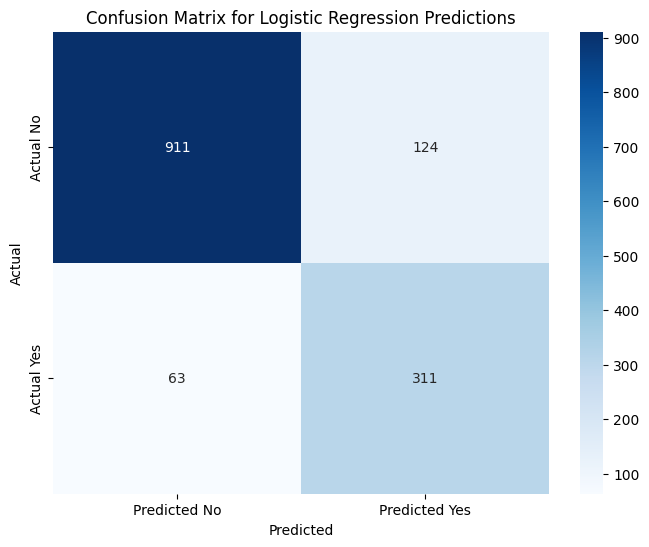

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_combined)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Combined Naive Bayes Predictions')
plt.show()

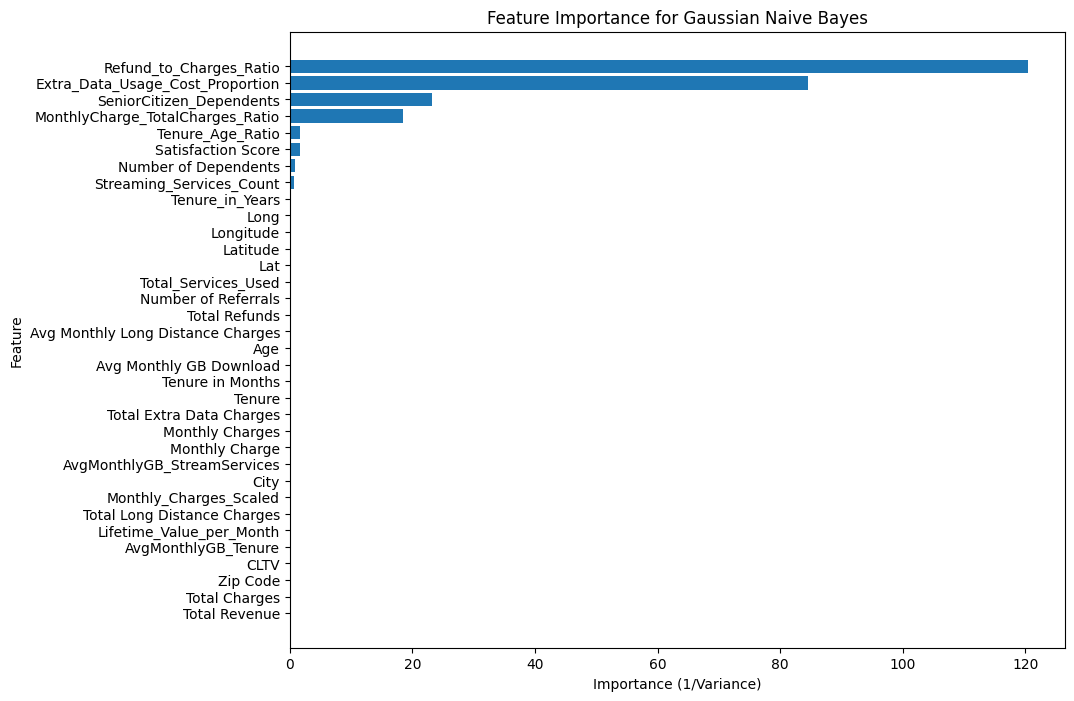

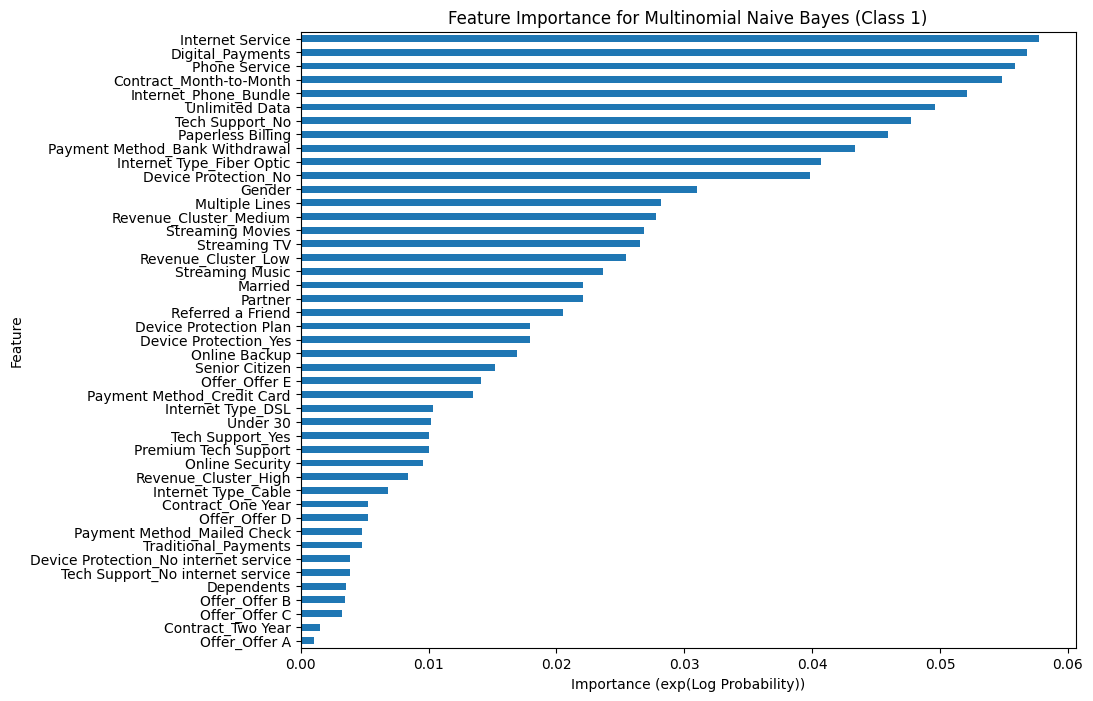

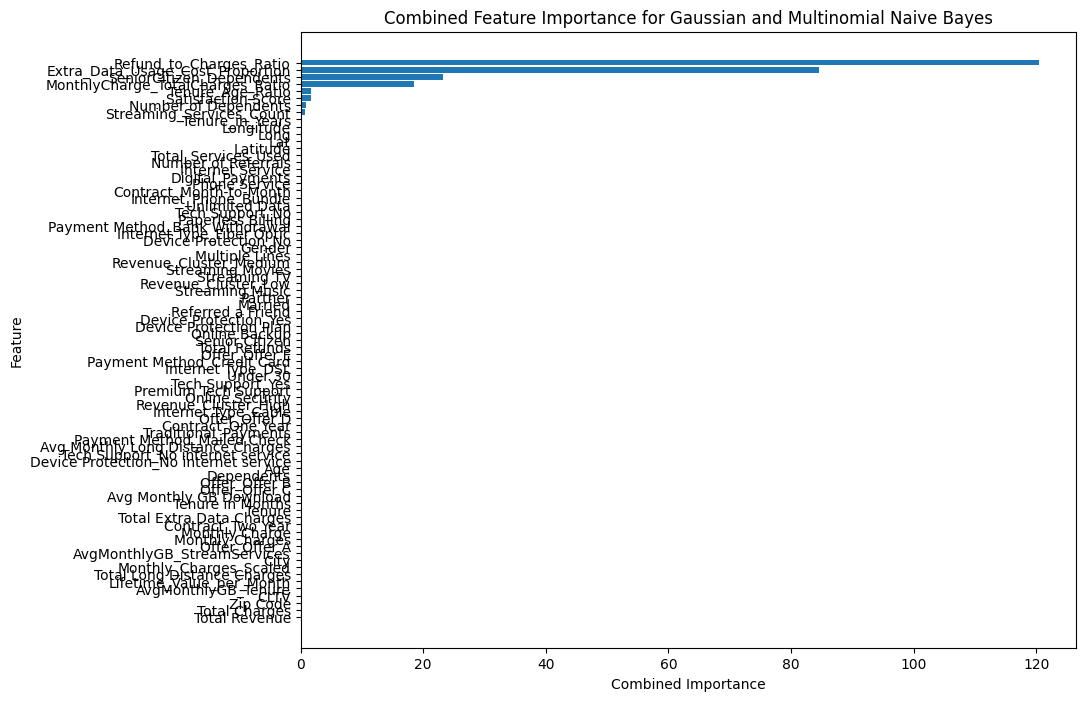

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Get the feature names
feature_names = X_train[continuous_features].columns

# Get the means and variances from the Gaussian Naive Bayes model
means = gnb.theta_
variances = gnb.var_

# Calculate the importance as the inverse of the variance (features with lower variance are more important)
importance = 1 / variances

# Create a DataFrame to hold feature names and their corresponding importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance[0]})

# Sort the DataFrame by the importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance (1/Variance)')
plt.ylabel('Feature')
plt.title('Feature Importance for Gaussian Naive Bayes')
plt.gca().invert_yaxis()
plt.show()
# Get the feature names for binary features
binary_feature_names = X_train[binary_features].columns

# Get the class log prior and feature log probabilities from the Multinomial Naive Bayes model
class_log_prior = mnb.class_log_prior_
feature_log_prob = mnb.feature_log_prob_

# Calculate the importance as the exponent of the feature log probabilities (features with higher probabilities are more important)
importance_binary = np.exp(feature_log_prob)

# Create a DataFrame to hold feature names and their corresponding importance for each class
feature_importance_binary_df = pd.DataFrame(importance_binary.T, index=binary_feature_names, columns=['Class 0 Importance', 'Class 1 Importance'])

# Sort the DataFrame by the importance for class 1
feature_importance_binary_df = feature_importance_binary_df.sort_values(by='Class 1 Importance', ascending=False)

# Plot the feature importance for binary features
plt.figure(figsize=(10, 8))
feature_importance_binary_df['Class 1 Importance'].plot(kind='barh')
plt.xlabel('Importance (exp(Log Probability))')
plt.ylabel('Feature')
plt.title('Feature Importance for Multinomial Naive Bayes (Class 1)')
plt.gca().invert_yaxis()
plt.show()

# Combine the importance from both models by concatenating them
combined_importance = np.concatenate((importance[0], importance_binary[1]))

# Combine the feature names from both models
combined_feature_names = np.concatenate((feature_names, binary_feature_names))

# Create a DataFrame to hold feature names and their corresponding combined importance
combined_feature_importance_df = pd.DataFrame({'Feature': combined_feature_names, 'Importance': combined_importance})

# Sort the DataFrame by the combined importance
combined_feature_importance_df = combined_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the combined feature importance
plt.figure(figsize=(10, 8))
plt.barh(combined_feature_importance_df['Feature'], combined_feature_importance_df['Importance'])
plt.xlabel('Combined Importance')
plt.ylabel('Feature')
plt.title('Combined Feature Importance for Gaussian and Multinomial Naive Bayes')
plt.gca().invert_yaxis()
plt.show()